<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNNを使って文字列を生成する

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm
import random

## 初期設定

In [35]:
batch_size = 4
n_layers = 2
n_hidden = 16
rnn_model = "RNN"

In [36]:
# 「三銃士」より
text = """On the first Monday of the month of April, 1625, the market town of Meung, in which the author of Romance of the Rose was born, appeared to be in as perfect a state of revolution as if the Huguenots had just made a second La Rochelle of it. Many citizens, seeing the women flying toward the High Street, leaving their children crying at the open doors, hastened to don the cuirass, and supporting their somewhat uncertain courage with a musket or a partisan, directed their steps toward the hostelry of the Jolly Miller, before which was gathered, increasing every minute, a compact group, vociferous and full of curiosity.
In those times panics were common, and few days passed without some city or other registering in its archives an event of this kind. There were nobles, who made war against each other; there was the king, who made war against the cardinal; there was Spain, which made war against the king. Then, in addition to these concealed or public, secret or open wars, there were robbers, mendicants, Huguenots, wolves, and scoundrels, who made war upon everybody. The citizens always took up arms readily against thieves, wolves or scoundrels, often against nobles or Huguenots, sometimes against the king, but never against the cardinal or Spain. It resulted, then, from this habit that on the said first Monday of April, 1625, the citizens, on hearing the clamor, and seeing neither the red-and-yellow standard nor the livery of the Duc de Richelieu, rushed toward the hostel of the Jolly Miller. When arrived there, the cause of the hubbub was apparent to all.
A young man—we can sketch his portrait at a dash. Imagine to yourself a Don Quixote of eighteen; a Don Quixote without his corselet, without his coat of mail, without his cuisses; a Don Quixote clothed in a woolen doublet, the blue color of which had faded into a nameless shade between lees of wine and a heavenly azure; face long and brown; high cheek bones, a sign of sagacity; the maxillary muscles enormously developed, an infallible sign by which a Gascon may always be detected, even without his cap—and our young man wore a cap set off with a sort of feather; the eye open and intelligent; the nose hooked, but finely chiseled. Too big for a youth, too small for a grown man, an experienced eye might have taken him for a farmer’s son upon a journey had it not been for the long sword which, dangling from a leather baldric, hit against the calves of its owner as he walked, and against the rough side of his steed when he was on horseback.
For our young man had a steed which was the observed of all observers. It was a Béarn pony, from twelve to fourteen years old, yellow in his hide, without a hair in his tail, but not without windgalls on his legs, which, though going with his head lower than his knees, rendering a martingale quite unnecessary, contrived nevertheless to perform his eight leagues a day. Unfortunately, the qualities of this horse were so well concealed under his strange-colored hide and his unaccountable gait, that at a time when everybody was a connoisseur in horseflesh, the appearance of the aforesaid pony at Meung—which place he had entered about a quarter of an hour before, by the gate of Beaugency—produced an unfavorable feeling, which extended to his rider.
And this feeling had been more painfully perceived by young D’Artagnan—for so was the Don Quixote of this second Rosinante named—from his not being able to conceal from himself the ridiculous appearance that such a steed gave him, good horseman as he was. He had sighed deeply, therefore, when accepting the gift of the pony from M. d’Artagnan the elder. He was not ignorant that such a beast was worth at least twenty livres; and the words which had accompanied the present were above all price.
“My son,” said the old Gascon gentleman, in that pure Béarn patois of which Henry IV. could never rid himself, “this horse was born in the house of your father about thirteen years ago, and has remained in it ever since, which ought to make you love it. Never sell it; allow it to die tranquilly and honorably of old age, and if you make a campaign with it, take as much care of it as you would of an old servant. At court, provided you have ever the honor to go there,” continued M. d’Artagnan the elder, “—an honor to which, remember, your ancient nobility gives you the right—sustain worthily your name of gentleman, which has been worthily borne by your ancestors for five hundred years, both for your own sake and the sake of those who belong to you. By the latter I mean your relatives and friends. Endure nothing from anyone except Monsieur the Cardinal and the king. It is by his courage, please observe, by his courage alone, that a gentleman can make his way nowadays. Whoever hesitates for a second perhaps allows the bait to escape which during that exact second fortune held out to him. You are young. You ought to be brave for two reasons: the first is that you are a Gascon, and the second is that you are my son. Never fear quarrels, but seek adventures. I have taught you how to handle a sword; you have thews of iron, a wrist of steel. Fight on all occasions. Fight the more for duels being forbidden, since consequently there is twice as much courage in fighting. I have nothing to give you, my son, but fifteen crowns, my horse, and the counsels you have just heard. Your mother will add to them a recipe for a certain balsam, which she had from a Bohemian and which has the miraculous virtue of curing all wounds that do not reach the heart. Take advantage of all, and live happily and long. I have but one word to add, and that is to propose an example to you—not mine, for I myself have never appeared at court, and have only taken part in religious wars as a volunteer; I speak of Monsieur de Tréville, who was formerly my neighbor, and who had the honor to be, as a child, the play-fellow of our king, Louis XIII., whom God preserve! Sometimes their play degenerated into battles, and in these battles the king was not always the stronger. The blows which he received increased greatly his esteem and friendship for Monsieur de Tréville. Afterward, Monsieur de Tréville fought with others: in his first journey to Paris, five times; from the death of the late king till the young one came of age, without reckoning wars and sieges, seven times; and from that date up to the present day, a hundred times, perhaps! So that in spite of edicts, ordinances, and decrees, there he is, captain of the Musketeers; that is to say, chief of a legion of Cæsars, whom the king holds in great esteem and whom the cardinal dreads—he who dreads nothing, as it is said. Still further, Monsieur de Tréville gains ten thousand crowns a year; he is therefore a great noble. He began as you begin. Go to him with this letter, and make him your model in order that you may do as he has done.”
Upon which M. d’Artagnan the elder girded his own sword round his son, kissed him tenderly on both cheeks, and gave him his benediction.
On leaving the paternal chamber, the young man found his mother, who was waiting for him with the famous recipe of which the counsels we have just repeated would necessitate frequent employment. The adieux were on this side longer and more tender than they had been on the other—not that M. d’Artagnan did not love his son, who was his only offspring, but M. d’Artagnan was a man, and he would have considered it unworthy of a man to give way to his feelings; whereas Mme. D’Artagnan was a woman, and still more, a mother. She wept abundantly; and—let us speak it to the praise of M. d’Artagnan the younger—notwithstanding the efforts he made to remain firm, as a future Musketeer ought, nature prevailed, and he shed many tears, of which he succeeded with great difficulty in concealing the half.
The same day the young man set forward on his journey, furnished with the three paternal gifts, which consisted, as we have said, of fifteen crowns, the horse, and the letter for M. de Tréville—the counsels being thrown into the bargain.
With such a vade mecum D’Artagnan was morally and physically an exact copy of the hero of Cervantes, to whom we so happily compared him when our duty of an historian placed us under the necessity of sketching his portrait. Don Quixote took windmills for giants, and sheep for armies; D’Artagnan took every smile for an insult, and every look as a provocation—whence it resulted that from Tarbes to Meung his fist was constantly doubled, or his hand on the hilt of his sword; and yet the fist did not descend upon any jaw, nor did the sword issue from its scabbard. It was not that the sight of the wretched pony did not excite numerous smiles on the countenances of passers-by; but as against the side of this pony rattled a sword of respectable length, and as over this sword gleamed an eye rather ferocious than haughty, these passers-by repressed their hilarity, or if hilarity prevailed over prudence, they endeavored to laugh only on one side, like the masks of the ancients. D’Artagnan, then, remained majestic and intact in his susceptibility, till he came to this unlucky city of Meung.
But there, as he was alighting from his horse at the gate of the Jolly Miller, without anyone—host, waiter, or hostler—coming to hold his stirrup or take his horse, D’Artagnan spied, though an open window on the ground floor, a gentleman, well-made and of good carriage, although of rather a stern countenance, talking with two persons who appeared to listen to him with respect. D’Artagnan fancied quite naturally, according to his custom, that he must be the object of their conversation, and listened. This time D’Artagnan was only in part mistaken; he himself was not in question, but his horse was. The gentleman appeared to be enumerating all his qualities to his auditors; and, as I have said, the auditors seeming to have great deference for the narrator, they every moment burst into fits of laughter. Now, as a half-smile was sufficient to awaken the irascibility of the young man, the effect produced upon him by this vociferous mirth may be easily imagined.
Nevertheless, D’Artagnan was desirous of examining the appearance of this impertinent personage who ridiculed him. He fixed his haughty eye upon the stranger, and perceived a man of from forty to forty-five years of age, with black and piercing eyes, pale complexion, a strongly marked nose, and a black and well-shaped mustache. He was dressed in a doublet and hose of a violet color, with aiguillettes of the same color, without any other ornaments than the customary slashes, through which the shirt appeared. This doublet and hose, though new, were creased, like traveling clothes for a long time packed in a portmanteau. D’Artagnan made all these remarks with the rapidity of a most minute observer, and doubtless from an instinctive feeling that this stranger was destined to have a great influence over his future life.
Now, as at the moment in which D’Artagnan fixed his eyes upon the gentleman in the violet doublet, the gentleman made one of his most knowing and profound remarks respecting the Béarnese pony, his two auditors laughed even louder than before, and he himself, though contrary to his custom, allowed a pale smile (if I may be allowed to use such an expression) to stray over his countenance. This time there could be no doubt; D’Artagnan was really insulted. Full, then, of this conviction, he pulled his cap down over his eyes, and endeavoring to copy some of the court airs he had picked up in Gascony among young traveling nobles, he advanced with one hand on the hilt of his sword and the other resting on his hip. Unfortunately, as he advanced, his anger increased at every step; and instead of the proper and lofty speech he had prepared as a prelude to his challenge, he found nothing at the tip of his tongue but a gross personality, which he accompanied with a furious gesture.
“I say, sir, you sir, who are hiding yourself behind that shutter—yes, you, sir, tell me what you are laughing at, and we will laugh together!”
The gentleman raised his eyes slowly from the nag to his cavalier, as if he required some time to ascertain whether it could be to him that such strange reproaches were addressed; then, when he could not possibly entertain any doubt of the matter, his eyebrows slightly bent, and with an accent of irony and insolence impossible to be described, he replied to D’Artagnan, “I was not speaking to you, sir.”
“But I am speaking to you!” replied the young man, additionally exasperated with this mixture of insolence and good manners, of politeness and scorn.
The stranger looked at him again with a slight smile, and retiring from the window, came out of the hostelry with a slow step, and placed himself before the horse, within two paces of D’Artagnan. His quiet manner and the ironical expression of his countenance redoubled the mirth of the persons with whom he had been talking, and who still remained at the window.
D’Artagnan, seeing him approach, drew his sword a foot out of the scabbard.
“This horse is decidedly, or rather has been in his youth, a buttercup,” resumed the stranger, continuing the remarks he had begun, and addressing himself to his auditors at the window, without paying the least attention to the exasperation of D’Artagnan, who, however, placed himself between him and them. “It is a color very well known in botany, but till the present time very rare among horses.”
“There are people who laugh at the horse that would not dare to laugh at the master,” cried the young emulator of the furious Tréville.
“I do not often laugh, sir,” replied the stranger, “as you may perceive by the expression of my countenance; but nevertheless I retain the privilege of laughing when I please.”
“And I,” cried D’Artagnan, “will allow no man to laugh when it displeases me!”
“Indeed, sir,” continued the stranger, more calm than ever; “well, that is perfectly right!” and turning on his heel, was about to re-enter the hostelry by the front gate, beneath which D’Artagnan on arriving had observed a saddled horse.
But, D’Artagnan was not of a character to allow a man to escape him thus who had the insolence to ridicule him. He drew his sword entirely from the scabbard, and followed him, crying, “Turn, turn, Master Joker, lest I strike you behind!”
“Strike me!” said the other, turning on his heels, and surveying the young man with as much astonishment as contempt. “Why, my good fellow, you must be mad!” Then, in a suppressed tone, as if speaking to himself, “This is annoying,” continued he. “What a godsend this would be for his Majesty, who is seeking everywhere for brave fellows to recruit for his Musketeers!”
He had scarcely finished, when D’Artagnan made such a furious lunge at him that if he had not sprung nimbly backward, it is probable he would have jested for the last time. The stranger, then perceiving that the matter went beyond raillery, drew his sword, saluted his adversary, and seriously placed himself on guard. But at the same moment, his two auditors, accompanied by the host, fell upon D’Artagnan with sticks, shovels and tongs. This caused so rapid and complete a diversion from the attack that D’Artagnan’s adversary, while the latter turned round to face this shower of blows, sheathed his sword with the same precision, and instead of an actor, which he had nearly been, became a spectator of the fight—a part in which he acquitted himself with his usual impassiveness, muttering, nevertheless, “A plague upon these Gascons! Replace him on his orange horse, and let him begone!”
“Not before I have killed you, poltroon!” cried D’Artagnan, making the best face possible, and never retreating one step before his three assailants, who continued to shower blows upon him.
“Another gasconade!” murmured the gentleman. “By my honor, these Gascons are incorrigible! Keep up the dance, then, since he will have it so. When he is tired, he will perhaps tell us that he has had enough of it.”
But the stranger knew not the headstrong personage he had to do with; D’Artagnan was not the man ever to cry for quarter. The fight was therefore prolonged for some seconds; but at length D’Artagnan dropped his sword, which was broken in two pieces by the blow of a stick. Another blow full upon his forehead at the same moment brought him to the ground, covered with blood and almost fainting.
It was at this moment that people came flocking to the scene of action from all sides. The host, fearful of consequences, with the help of his servants carried the wounded man into the kitchen, where some trifling attentions were bestowed upon him."""


In [37]:
text = text.encode('ascii', 'ignore')
# text

In [38]:
# list(map(lambda x:ord(x), text))

## データセットの定義

In [39]:
class MyDataset(torch.utils.data.Dataset) :
  def __init__(self, text, num):
    # self.data = torch.tensor(list(map(lambda x:ord(x), text)))
    self.data = torch.tensor(list(text))
    self.num = num

  def __len__(self):
    return 100

  def __getitem__(self, idx):
    start = random.randint(0, len(self.data)-self.num-1)
    sel = self.data[start:start+self.num+1]
    onehot = F.one_hot(sel, num_classes = 256)
    x = onehot[:-1].to(torch.float)
    y = onehot[1:].to(torch.float)
    return x, y

In [40]:
dataset = MyDataset(text, 100)
x, y = dataset[0]
x.shape, y.shape

(torch.Size([100, 256]), torch.Size([100, 256]))

In [41]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

## モデルの定義

In [42]:
class MyModel(nn.Module):
    def __init__(self, n_input, n_hidden, n_output, rnn = "RNN", n_layers=2):
        super(MyModel, self).__init__()
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        if rnn == "RNN" :
          self.rnn = nn.RNN(n_input, n_hidden, num_layers=n_layers, batch_first=True)
        else :
          self.rnn = nn.GRU(n_input, n_hidden, num_layers=n_layers, batch_first=True)

        self.out = nn.Linear(n_hidden, n_output)

    def forward(self, x, h=None):
        output, hp = self.rnn(x.unsqueeze(1), h)
        output = self.out(output.squeeze(1))
        # print(x.shape, h.shape)
        # x = x.unsqueeze(1)
        # print(x.shape, h.shape)

        # output, hp = self.rnn(x, h)
        # output = self.out(output)
        return output, hp

    def initHidden(self, batch_size):
        return torch.zeros(1, self.n_hidden*self.n_layers*batch_size).reshape(self.n_layers, batch_size, self.n_hidden)


## モデルの生成

In [43]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [44]:
model = MyModel(256, n_hidden, 256, rnn=rnn_model, n_layers=n_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

## 学習

In [45]:
n_epoch = 100
lloss = []
model.train()
for epoch in tqdm(range(n_epoch)):
    running_loss = 0.0
    cnt = 0
    for i, data in enumerate(train_loader):
        xs, ys = data
        xs = xs.to(device)
        ys = ys.to(device)
        h = model.initHidden(xs.shape[0]).to(device)
        xs = xs.permute(1, 0, 2)
        ys = ys.permute(1, 0, 2)
        # print(xs.shape, h.shape)
        for x, y in zip(xs, ys):
          x = x.to(device)
          y = y.to(device)
          # print(x.shape, y.shape)
          optimizer.zero_grad()
          h = h.detach() # 隠れステートにバックプロパゲーションされないように、detach
          output, h = model(x, h)
          # print(output.shape)
          loss = criterion(output, y)
          loss.backward()
          optimizer.step()
          running_loss += float(loss.detach().cpu())
          cnt += 1

    lloss.append(running_loss/cnt)

  0%|          | 0/100 [00:00<?, ?it/s]

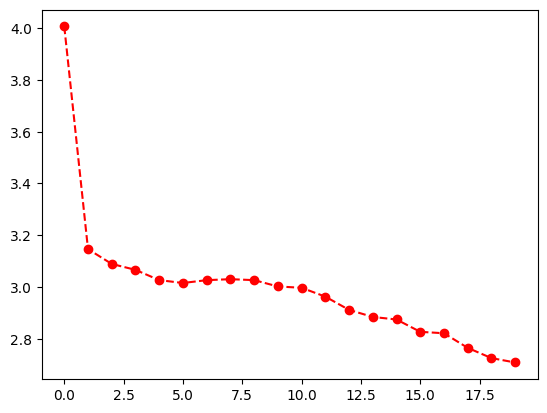

In [46]:
plt.plot(lloss[:20], 'ro--')

## 文字列を生成してみる

In [47]:
# # 制御文字をカット
# def cutcode(y) :
#   m = y.min()
#   for i in range(256):
#     if i <= 0x1f or i >= 0x7f :
#       y[0, i] = m
#   return y

In [48]:
cur = 'T'
model.eval()
h = model.initHidden(1).to(device)
ans = [cur]
for i in range(500) :
  x = torch.tensor(ord(cur))
  x = F.one_hot(x, num_classes=256).to(torch.float).unsqueeze(0).to(device)
  with torch.no_grad() :
    y, _ = model(x, h)
  # y = cutcode(y)
  # c = chr(y.argmax())
  # sel = torch.multinomial(y.softmax(axis=1), num_samples=1)
  # if sel <= 0x1f or sel >= 0x7f : continue
  # c = chr(sel.item())
  c = chr(y.argsort(descending=True)[0, random.randint(0, 5)])
  # c = chr(y.argsort(descending=True)[0, int(min(2, abs(random.gauss(0, 2))))])
  ans.append(c)
  cur = c

In [53]:
print("".join(ans))
"".join(ans)

Thounst w s henthr tidir,,sss, h homy sderitinthon s towaratine s ofofit wan ta agofir,.r omidelaron ta arasted t hr,s ag hrom aselidraselirasdron a hate an owofe ome tow as owansdis,risdisdenerens omyrofr s w sthrousduned,,sthom s,rowed,s,rind sd,r,rofeles owhil whonerid,rasdin a ha homof terendr oristast whisdr of warirathre s,s,se antagofoute oforor h wir,,rederomestedrinss, on w astherowagas, sdel tond, wed,s oma standid,,ra ofasserense s,,s,.,romes hongidin teriss, wilarofilronesdessthagindu


'Thounst w s henthr tidir,,sss, h homy sderitinthon s towaratine s ofofit wan ta agofir,.r omidelaron ta arasted t hr,s ag hrom aselidraselirasdron a hate an owofe ome tow as owansdis,risdisdenerens omyrofr s w sthrousduned,,sthom s,rowed,s,rind sd,r,rofeles owhil whonerid,rasdin a ha homof terendr oristast whisdr of warirathre s,s,se antagofoute oforor h wir,,rederomestedrinss, on w astherowagas, sdel tond, wed,s oma standid,,ra ofasserense s,,s,.,romes hongidin teriss, wilarofilronesdessthagindu'

In [50]:
model

MyModel(
  (rnn): RNN(256, 16, num_layers=2, batch_first=True)
  (out): Linear(in_features=16, out_features=256, bias=True)
)

In [51]:
torch.save(model.state_dict(), "model.pth")

In [52]:
!ls -l

total 44
-rw-r--r-- 1 root root 40092 Apr 26 07:22 model.pth
drwxr-xr-x 1 root root  4096 Apr 24 13:26 sample_data
